In [61]:
#%pip install tueplots

In [1]:
%matplotlib inline
import os

import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from tueplots import bundles
from tueplots.constants.color import rgb

In [2]:
os.getenv("DATASET_PATH")

'/Users/kayoonkim/Documents/2023-wise/data-literacy/city-recsys/streamlit/streamlit/all-data-best-city.csv'

In [35]:
final_df = pd.read_csv(os.getenv("DATASET_PATH"), index_col=0)

In [36]:
final_df['city_ascii'] = final_df['city_ascii'].str.strip()

In [37]:
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852


In [38]:
# Min-Max Scaling all our indexes
final_df['scaled_cost_live_rent_index'] = 1 - ( (final_df['cost_live_rent_index'] - final_df['cost_live_rent_index'].min()) /
                                           (final_df['cost_live_rent_index'].max() - final_df['cost_live_rent_index'].min()) )
final_df['scaled_purchase_pow_index'] = ( (final_df['purchase_pow_index'] - final_df['purchase_pow_index'].min()) /
                                           (final_df['purchase_pow_index'].max() - final_df['purchase_pow_index'].min()) )
final_df['scaled_safety_index'] = ( (final_df['safety_index'] - final_df['safety_index'].min()) /
                                           (final_df['safety_index'].max() - final_df['safety_index'].min()) )
final_df['scaled_pollution_index'] = 1 - ( (final_df['pollution_index'] - final_df['pollution_index'].min()) /
                                           (final_df['pollution_index'].max() - final_df['pollution_index'].min()) )
final_df['scaled_trffic_min_index'] = 1 - ( (final_df['trffic_min_index'] - final_df['trffic_min_index'].min()) /
                                           (final_df['trffic_min_index'].max() - final_df['trffic_min_index'].min()) )
final_df['scaled_mean_tmp'] = ( (final_df['mean_tmp'] - final_df['mean_tmp'].min()) /
                                           (final_df['mean_tmp'].max() - final_df['mean_tmp'].min()) )
final_df['scaled_tmp_std_dev'] = ( (final_df['std_dev_temp'] - final_df['std_dev_temp'].min()) /
                                           (final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()) )

final_df = final_df.drop(['cost_live_rent_index', 'purchase_pow_index', 'safety_index', 'pollution_index',
                          'trffic_min_index', 'city_ascii', 'country', 'mean_tmp', 'std_dev_temp'],
                         axis=1)
final_df.head()

,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
0,21.3294,-157.8460,0.119138,0.464207,0.517190,0.730670,0.551064,0.837757,0.145254
1,47.6211,-122.3244,0.081115,0.715129,0.414051,0.760309,0.436170,0.112158,0.479235
2,-35.2931,149.1269,0.262357,0.425092,0.807175,0.871134,0.512766,0.205908,0.507095
3,-34.9275,138.6000,0.319392,0.411808,0.727952,0.858247,0.474468,0.414812,0.405894
4,42.3188,-71.0852,0.098859,0.701845,0.621824,0.791237,0.444681,0.150529,0.802480


In [39]:
final_df.columns

Index(['lat', 'lng', 'scaled_cost_live_rent_index',
       'scaled_purchase_pow_index', 'scaled_safety_index',
       'scaled_pollution_index', 'scaled_trffic_min_index', 'scaled_mean_tmp',
       'scaled_tmp_std_dev'],
      dtype='object')

In [43]:
final_df.describe()

,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,26.269406,6.210760,0.570639,0.418397,0.553281,0.540156,0.613195,0.400463,0.510946
std,28.471539,79.900214,0.238457,0.238509,0.224254,0.270383,0.194713,0.291180,0.237944
min,-41.288900,-157.846000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.344000,-71.704325,0.374842,0.183948,0.414051,0.338918,0.501596,0.149926,0.354693
50%,36.896650,16.177900,0.631179,0.432472,0.546338,0.553479,0.627660,0.343622,0.531311
75%,45.477400,50.223625,0.777250,0.603321,0.732063,0.776740,0.764894,0.603168,0.716949
max,59.950000,174.777200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
final_df.columns.tolist()[2:7]

['scaled_cost_live_rent_index',
 'scaled_purchase_pow_index',
 'scaled_safety_index',
 'scaled_pollution_index',
 'scaled_trffic_min_index']

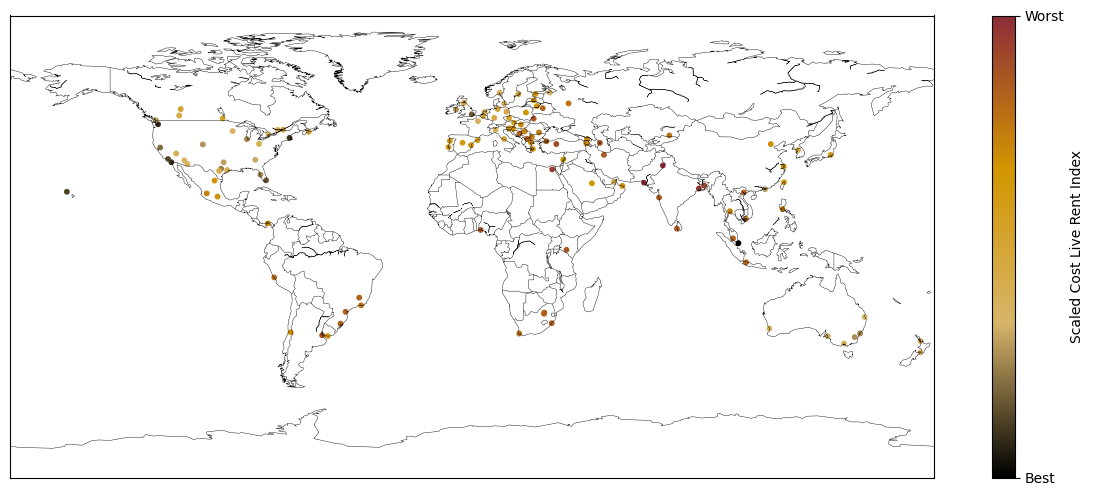

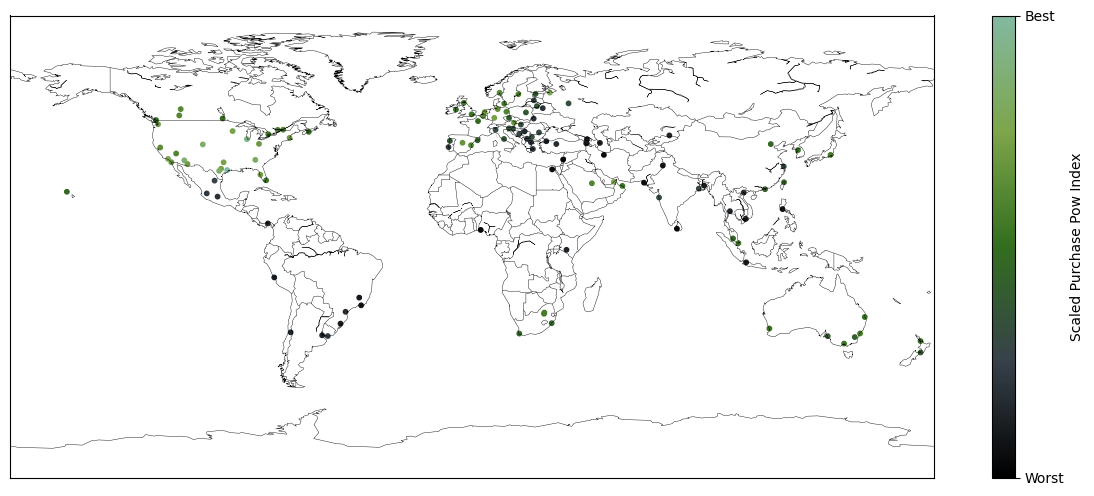

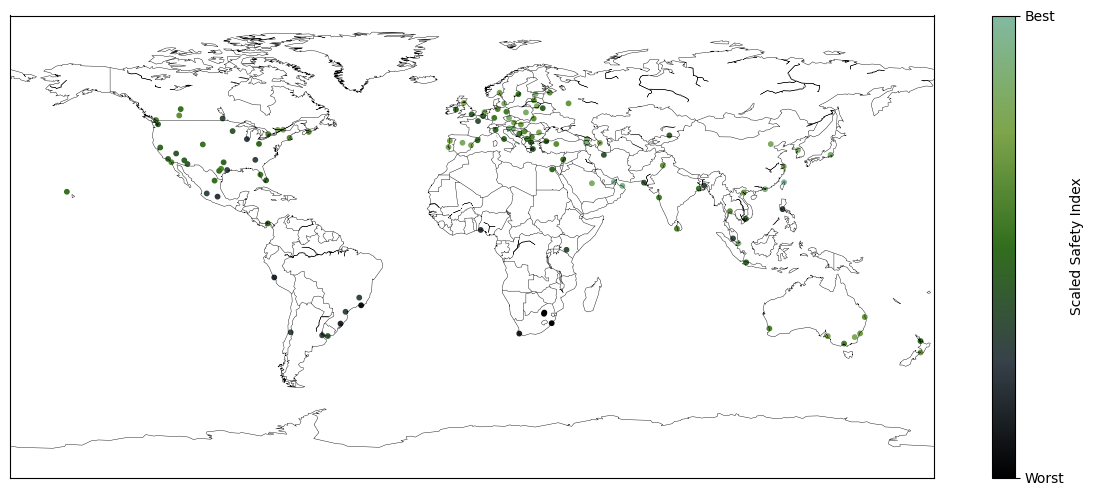

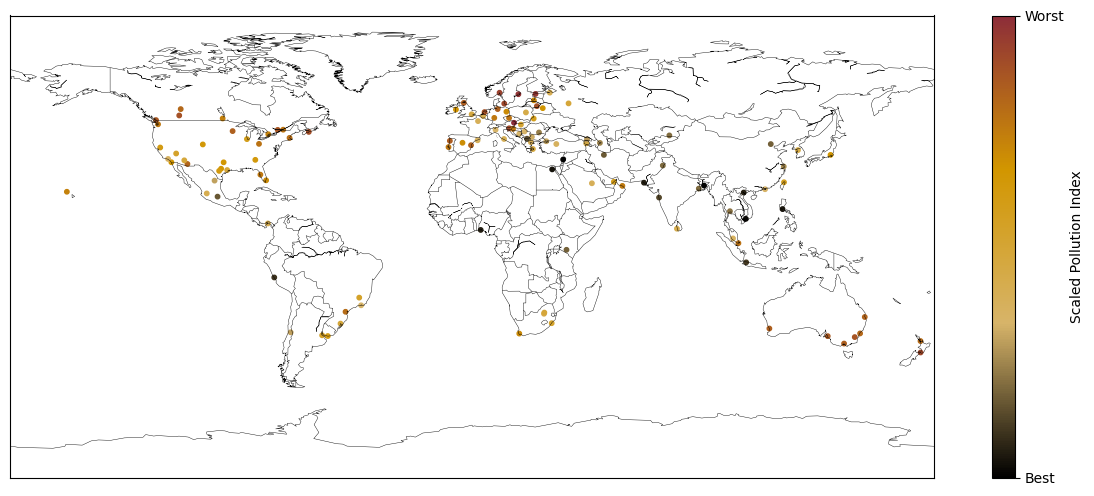

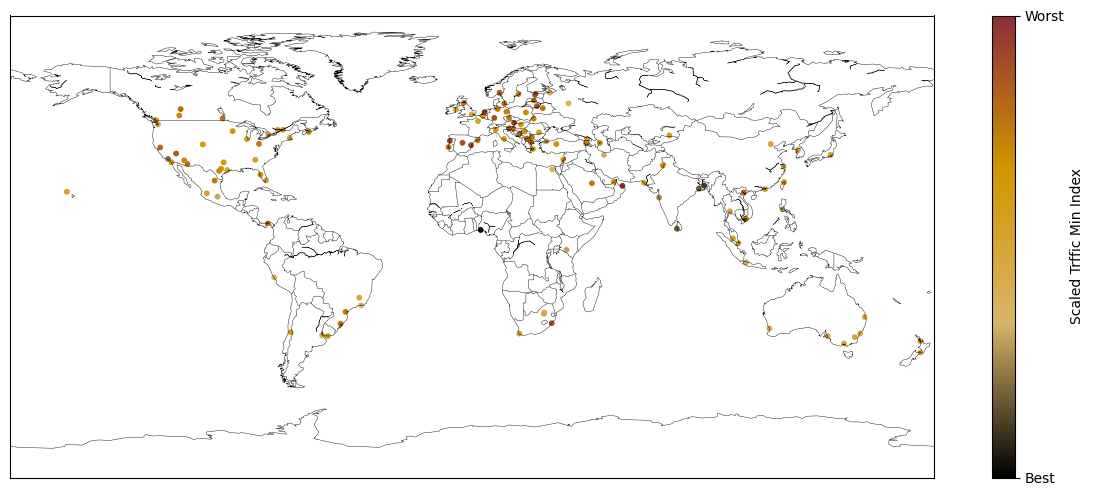

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap


# Create a customized colormap using tueplot.color
cmap_blue = LinearSegmentedColormap.from_list(name='cmap_blue', colors=['black', rgb.tue_dark, rgb.tue_darkgreen, rgb.tue_green, rgb.tue_lightgreen])
cmap_red = LinearSegmentedColormap.from_list(name='cmap_red', colors=['black', rgb.tue_lightorange, rgb.tue_orange, rgb.tue_red])

# List of features to plot with red color
red_features = ['scaled_cost_live_rent_index', 'scaled_pollution_index', 'scaled_trffic_min_index']

# Get all features
all_features = final_df.columns.tolist()[2:7]

# Remove red features from all features to get green features
green_features = [feature for feature in all_features if feature not in red_features]

for feature in all_features:
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(15, 6))

    # Create a basemap of the world
    m = Basemap(projection='cyl', resolution='c', ax=ax)

    # Draw coastlines and countries with thinner lines
    m.drawcoastlines(linewidth=0.3)
    m.drawcountries(linewidth=0.3)

    # Convert latitudes and longitudes to map projection coordinates
    x, y = m(final_df['lng'].values, final_df['lat'].values)

    # Create a scatter plot on the map
    if feature in red_features:
        sc = ax.scatter(x, y, c=final_df[feature], cmap=cmap_red, s=10)
        cbar_r = plt.colorbar(sc, label=feature.replace('_', ' ').title())
        cbar_r.ax.set_yticks([0,1])
        cbar_r.ax.set_yticklabels(['Best', 'Worst'])
    else:
        sc = ax.scatter(x, y, c=final_df[feature], cmap=cmap_blue, s=10)
        cbar_g=plt.colorbar(sc, label=feature.replace('_', ' ').title())
        cbar_g.ax.set_yticks([0,1])
        cbar_g.ax.set_yticklabels(['Worst', 'Best'])

    # Show the plot
    plt.show()